使用数据集预测房价

### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>MoSold: Month Sold</li>
          <li>YrSold: Year Sold</li><br>
          
          <li>SaleType: Type of sale</li>
          <li>SaleCondition: Condition of sale</li><br>

          <li>MSSubClass: The building class</li>
          <li>MSZoning: The general zoning classification</li><br>

          <li>Neighborhood: Physical locations within Ames city limits</li>
          <li>Street: Type of road access</li>
          <li>Alley: Type of alley access</li><br>

          <li>LotArea: Lot size in square feet</li>
          <li>LotConfig: Lot configuration</li>
          <li>LotFrontage: Linear feet of street connected to property</li>
          <li>LotShape: General shape of property</li><br>

          <li>LandSlope: Slope of property</li>
          <li>LandContour: Flatness of the property</li><br>

          <li>YearBuilt: Original construction date</li>
          <li>YearRemodAdd: Remodel date</li>
          <li>OverallQual: Overall material and finish quality</li>
          <li>OverallCond: Overall condition rating</li><br>

          <li>Utilities: Type of utilities available</li>
          <li>Foundation: Type of foundation</li>
          <li>Functional: Home functionality rating</li><br>

          <li>BldgType: Type of dwelling</li>
          <li>HouseStyle: Style of dwelling</li><br>
          
          <li>1stFlrSF: First Floor square feet</li>
          <li>2ndFlrSF: Second floor square feet</li>
          <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
          <li>GrLivArea: Above grade (ground) living area square feet</li>
          <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li><br>

          <li>Condition1: Proximity to main road or railroad</li>
          <li>Condition2: Proximity to main road or railroad (if a second is present)</li><br>
          
          <li>RoofStyle: Type of roof</li>
          <li>RoofMatl: Roof material</li><br>

          <li>ExterQual: Exterior material quality</li>
          <li>ExterCond: Present condition of the material on the exterior</li>
          <li>Exterior1st: Exterior covering on house</li>
          <li>Exterior2nd: Exterior covering on house (if more than one material)</li><br><br>
          
        </ul>
      </td>
      
      <td valign="top">
        <ul>
          <li>MasVnrType: Masonry veneer type</li>
          <li>MasVnrArea: Masonry veneer area in square feet</li><br>
          
          <li>WoodDeckSF: Wood deck area in square feet</li>
          <li>OpenPorchSF: Open porch area in square feet</li>
          <li>EnclosedPorch: Enclosed porch area in square feet</li>
          <li>3SsnPorch: Three season porch area in square feet</li>
          <li>ScreenPorch: Screen porch area in square feet</li><br>

          <li>PoolArea: Pool area in square feet</li>
          <li>PoolQC: Pool quality</li>
          <li>Fence: Fence quality</li>
          <li>PavedDrive: Paved driveway</li><br>

          <li>GarageType: Garage location</li>
          <li>GarageYrBlt: Year garage was built</li>
          <li>GarageFinish: Interior finish of the garage</li>
          <li>GarageCars: Size of garage in car capacity</li>
          <li>GarageArea: Size of garage in square feet</li>
          <li>GarageQual: Garage quality</li>
          <li>GarageCond: Garage condition</li><br>

          <li>Heating: Type of heating</li>
          <li>HeatingQC: Heating quality and condition</li>
          <li>CentralAir: Central air conditioning</li>
          <li>Electrical: Electrical system</li><br>
          
          <li>FullBath: Full bathrooms above grade</li>
          <li>HalfBath: Half baths above grade</li><br>
          
          <li>BedroomAbvGr: Number of bedrooms above basement level</li><br>
          
          <li>KitchenAbvGr: Number of kitchens</li>
          <li>KitchenQual: Kitchen quality</li><br>
          
          <li>Fireplaces: Number of fireplaces</li>
          <li>FireplaceQu: Fireplace quality</li><br>
          
          <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
          <li>MiscVal: Value of miscellaneous feature</li><br>
          
          <li>BsmtQual: Height of the basement</li>
          <li>BsmtCond: General condition of the basement</li>
          <li>BsmtExposure: Walkout or garden level basement walls</li>
          <li>BsmtFinType1: Quality of basement finished area</li>
          <li>BsmtFinSF1: Type 1 finished square feet</li>
          <li>BsmtFinType2: Quality of second finished area (if present)</li>
          <li>BsmtFinSF2: Type 2 finished square feet</li>
          <li>BsmtUnfSF: Unfinished square feet of basement area</li>
          <li>BsmtFullBath: Basement full bathrooms</li>
          <li>BsmtHalfBath: Basement half bathrooms</li>
          <li>TotalBsmtSF: Total square feet of basement area</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>


In [27]:
import os
import pandas as pd
import numpy as np
data_path = ['dataset']
filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath)#, sep=','

In [28]:
data.shape#数据集大小

(1379, 80)

In [29]:
data.dtypes.value_counts()#列的类型

object     43
float64    21
int64      16
dtype: int64

无序分类应该是one-hot编码，但是这样显着增加特征的数量并创建彼此高度相关的特征，one-hot 编码列的总数是 n-1，其中 n 是类别的数量。

In [30]:
#选择类型是boject的列
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [31]:
categorical_cols

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [32]:
#查看会创建多少额外的列
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
num_ohc_cols

Neighborhood     25
Exterior2nd      16
Exterior1st      14
SaleType          9
Condition1        9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      7
FireplaceQu       6
Foundation        6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
Heating           6
GarageType        6
BsmtExposure      5
Electrical        5
Fence             5
GarageCond        5
GarageQual        5
BsmtQual          5
LotConfig         5
MSZoning          5
MiscFeature       5
BldgType          5
HeatingQC         5
KitchenQual       4
LandContour       4
BsmtCond          4
LotShape          4
MasVnrType        4
ExterQual         4
ExterCond         4
PoolQC            4
Alley             3
GarageFinish      3
LandSlope         3
PavedDrive        3
CentralAir        2
Street            2
Utilities         2
dtype: int64

In [33]:
# 如果只有一个值则不需要编码
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]
#one hot编码比类别少一
small_num_ohc_cols -= 1
#
small_num_ohc_cols.sum()

215

- .copy() 方法为独热编码创建一个完全独立的数据帧副本
- 独热编码后一定要删除原始列
- 不是one-hot 编码的数据，需要删除string类型的离散值

使用LabelEncoder或者 DictVectorizer将string类型的离散值数值化

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# 复制数据
data_ohc = data.copy()

# 编码器
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # 整数编码字符串类别
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
     
    # 删除原始列
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot 编码数据--返回稀疏array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))
   
    # 创建不一样的列名
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # 创建新的 dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

In [35]:
#列数量的差异
data_ohc.shape[1] - data.shape[1]

215

In [36]:
print(data.shape[1])

# 删除data的string列
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

80
37


In [37]:
data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


- 创建两个数据集的训练和测试分割。
- 为确保数据以相同的方式拆分，请在两个拆分数据集方法中使用相同的 random_state。
- 对于每个数据集，在训练数据上拟合一个基本的线性回归模型。
- 计算各自模型的训练集和测试集的均方误差。
 

In [38]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# 拆分不是独热编码的数据集
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# 拆分是独热编码的数据集
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [39]:
# 比较索引确保相等
(X_train_ohc.index == X_train.index).all()

True

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()#模型
error_df = list()#保存error值的列表
#非独热编码
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))
 
#独热编码
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))
#连接结果
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
train,1.131507e+09,3.177267e+08
test,1.372182e+09,6.048710e+12


请注意，对于训练和测试数据，one-hot 编码数据上的错误值非常不同。
尤其是测试数据上的误差要高得多。
这是因为 one-hot 编码模型过度拟合数据。

对于每个数据集（独热编码和未编码）：使用以下之一缩放所有非热编码值：StandardScaler、MinMaxScaler、MaxAbsScaler。
比较在测试集上计算的误差确保计算偏斜（以确定是否应该进行转换）并仅在训练数据上拟合缩放器，然后将其同样应用于训练和测试数据


In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# 初始化模型
LR = LinearRegression()

# 迭代所有可能的联接获取errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy 因为不需要scale超过一次.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


not_encoded - standardscaling        1.372182e+09
not_encoded - minmaxscaling          1.372161e+09
not_encoded - maxabsscaling          1.372683e+09
one_hot_encoded - standardscaling    8.065328e+09
one_hot_encoded - minmaxscaling      8.065328e+09
one_hot_encoded - maxabsscaling      8.065328e+09
--------------------------------------------------------------------------------
not_encoded - standardscaling 1372182358.9345138
not_encoded - minmaxscaling 1372160679.4641728
not_encoded - maxabsscaling 1372682568.6731877
one_hot_encoded - standardscaling 8065327607.2472315
one_hot_encoded - minmaxscaling 8065327607.227574
one_hot_encoded - maxabsscaling 8065327607.193239


绘制其中一个模型的预测值与实际值

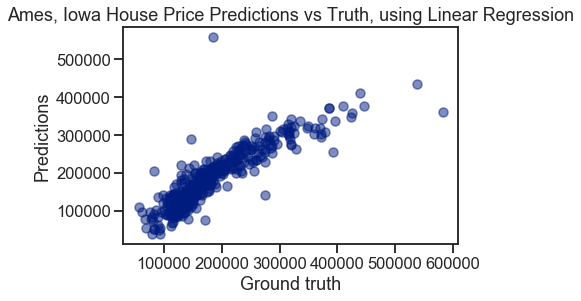

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# 使用 y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');

In [72]:
filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath, sep=',')#加载数据

# 获取由string类别组成的一个Pd.Series 
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  #  
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # 离散值列表
print(one_hot_encode_cols)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

#  one hot 编码
data = pd.get_dummies(data, columns=one_hot_encode_cols)

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


H:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [73]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

很多列由倾斜的特征-log转换可以应用

In [74]:
#创建一个值为float类型的列的列表来检查倾斜
mask = data.dtypes == np.float
float_cols = data.columns[mask]

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [75]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


转换偏斜大于 0.75 的所有列，除了“SalePrice”。

In [76]:

# field = "BsmtFinSF1"
# fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
# train[field].hist(ax=ax_before)
# train[field].apply(np.log1p).hist(ax=ax_after)
# ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
# ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
# fig.suptitle('Field "{}"'.format(field));

In [77]:
for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    train[col] = np.log1p(train[col])
    test[col]  = test[col].apply(np.log1p) 

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [78]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test  = test[feature_cols]
y_test  = test['SalePrice']

In [79]:
from sklearn.metrics import mean_squared_error
#计算均方差

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

- 拟合基本线性回归模型
- 打印此模型的均方根误差，
- 绘制基于模型的预测与实际销售价格。

In [80]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

306369.68342319806


H:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


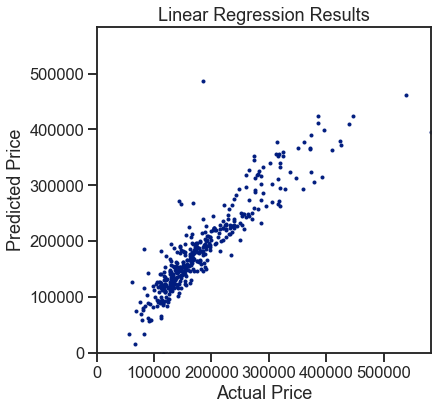

In [81]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

岭回归（翻看几个单元格后可以看到介绍）使用 L2 归一化来降低系数的大小。这在存在高方差的情况下会很有帮助。 
Scikit-learn 中的正则化函数每个都包含内置交叉验证的版本。
- 将常规（非交叉验证）岭模型拟合到一系列 α  值，并使用创建的交叉验证误差函数绘制 RMSE
- 使用 [0.005,0.05,0.1,0.3,1,3,5,10,15,30,80] 作为 alpha 的范围。
- 然后使用之前房价预测中的 α 值范围重复 Ridge 模型的拟合。比较结果。

In [82]:
#现在是 RidgeCV 方法。不幸的是，无法获得未选择模型的 alpha 值。由此产生的误差值和 α 值与上面获得的非常相似。
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

15.0 32169.17620567246


与 RidgeCV 函数非常相似，还有一个 LassoCV 函数，它使用 L1 正则化函数和交叉验证。 
L1 正则化会选择性地收缩一些系数，有效地执行特征消除。

LassoCV 函数不允许设置评分函数。
但是，上面创建的自定义误差函数 (rmse) 可用于评估最终模型的误差。

同样，还有一个带有交叉验证的弹性网络函数 ElasticNetCV，它是 L2 和 L1 正则化的组合。

- 使用交叉验证拟合 Lasso 模型，并使用上面创建的函数确定 α 和 RMSE 的最佳值。请注意，α 的大小可能与 Ridge 模型不同。
- 对弹性网络模型重复此操作。
- 通过表格和/或绘图比较结果。

使用以下alphas:
[1e-5, 5e-5, 0.0001, 0.0005]



In [83]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse) 

H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94004559874.13617, tolerance: 387053725.5878631
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93994604048.47357, tolerance: 387053725.5878631
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93994499320.0592, tolerance: 387053725.5878631
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

0.0005 39257.39399144776


H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200763773571.4656, tolerance: 610299085.7005944
  positive)


In [84]:
#查看非零值的特征
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 294 coefficients, 273 are non-zero with Lasso.


In [85]:
#现在尝试弹性网络，使用lasso同样的alpha,并且L1_ratios再0.1-0.9
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100160185887.15576, tolerance: 487372561.3038374
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167868205507.94666, tolerance: 487372561.3038374
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164350387911.20044, tolerance: 487372561.3038374
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143128546310.38956, tolerance: 464569448.3765248
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78586857273.42131, tolerance: 534955063.02047503
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180138867612.98312, tolerance: 534955063.02047503
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162715485974.85898, tolerance: 487372561.3038374
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161931683462.36642, tolerance: 487372561.3038374
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78054852803.79121, tolerance: 465192498.4087122
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176990491397.21277, tolerance: 534955063.02047503
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173842635677.20764, tolerance: 534955063.02047503
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175343558280.07684, tolerance: 534955063.02047503
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140048770387.18182, tolerance: 465192498.4087122
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135298873426.20479, tolerance: 465192498.4087122
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133504622247.19885, tolerance: 465192498.4087122
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175379694571.73413, tolerance: 534955063.02047503
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155726111271.003, tolerance: 488440735.7074999
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149332881118.18604, tolerance: 488440735.7074999
  tol, rng, random, positive)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

0.0005 0.1 35001.234296074574


H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32162755250.822815, tolerance: 610299085.7005944
  positive)


In [86]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,306369.683423
Ridge,32169.176206
Lasso,39257.393991
ElasticNet,35001.234296


H:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
H:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy arra

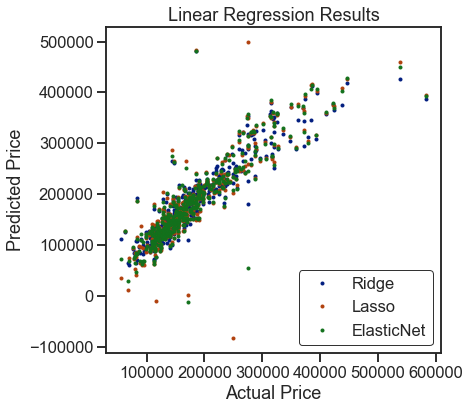

In [87]:
# #作图
# f = plt.figure(figsize=(6,6))
# ax = plt.axes()

# labels = ['Ridge', 'Lasso', 'ElasticNet']

# models = [ridgeCV, lassoCV, elasticNetCV]

# for mod, lab in zip(models, labels):
#     ax.plot(y_test, mod.predict(X_test), 
#              marker='o', ls='', ms=3.0, label=lab)


# leg = plt.legend(frameon=True)
# leg.get_frame().set_edgecolor('black')
# leg.get_frame().set_linewidth(1.0)

# ax.set(xlabel='Actual Price', 
#        ylabel='Predicted Price', 
#        title='Linear Regression Results');

探索随机梯度下降。
回想一下，线性模型通常对缩放敏感。然而，SGD 对缩放非常敏感。
此外，学习率过高会导致算法发散，而学习率过低可能需要很长时间才能收敛。

- 拟合一个没有正则化惩罚的随机梯度下降模型（相关参数是惩罚）。
- 现在使用由上述交叉验证确定的参数值，用三个惩罚项（L2、L1、弹性网络）中的每一个拟合随机梯度下降模型。
- 在拟合模型之前不要缩放数据。
- 将结果与不使用随机梯度下降获得的结果进行比较。

In [88]:
#引入SGD回归器，准备参数
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    #将 dict项作为参数传递
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,306369.683423,5.359612e+15
Ridge,32169.176206,2.497940e+15
Lasso,39257.393991,9.837581e+15
ElasticNet,35001.234296,3.809127e+15


注意误差值有多高！算法没有收敛。这可能是由于缩放和/或学习率太高。调整学习率，看看会发生什么

- 创建SGDClassifier的实例时传入eta0=1e-7。
- 重新计算所有惩罚的错误并进行比较。


In [89]:
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,306369.683423,5.359612e+15,74208.838374
Ridge,32169.176206,2.497940e+15,74256.697993
Lasso,39257.393991,9.837581e+15,74634.901623
ElasticNet,35001.234296,3.809127e+15,73245.998172




linear regression
- 线性回归拟合别的数据。

ridge regression

lasso regression

- 使用岭回归 (αalpha=0.001) 和套索回归 (α alpha=0.0001) 对使用具有多项式特征的别的数据进行回归。


In [44]:
import pandas as pd
import numpy as np
from __future__ import print_function
import os
data_path = ['dataset']

filepath = os.sep.join(data_path + ['X_Y_Sinusoid_Data.csv'])
data = pd.read_csv(filepath)#加载数据

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 设置多项式特征数量
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()#线性模型

# 提取数据 
X_data = data[['x']]
#PolynomialFeatures 需要dataframe（具有一列，而不是series）或维度为 (X, 1) 的二维数组，其中 X 是长度。
Y_data = data['y']

# 多项式模型拟合数据
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

In [46]:
from sklearn.linear_model import Ridge, Lasso

#   ridge 回归模型
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

#  lasso 回归模型
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

H:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4469570520796867, tolerance: 0.0012227586753890333
  positive)


In [47]:
# 查看每个模型的绝对值系数

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # 正则化和非正则化数据差异很大

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.787139e+13,2.169397,2.167284
std,5.994042e+13,2.900278,4.706731
min,1.619308e+07,0.000000,0.000000
25%,3.414772e+12,0.467578,0.000000
50%,3.634503e+13,1.017272,0.252181
75%,1.064203e+14,2.883507,1.641353
max,1.643575e+14,12.429635,20.176708
